# 5. Auto Encoders

Auto encoders compress input data into a limited number of features. In details:
* Unsupervised machine learning algorithm.
* Dimension reduction of the input data, comparable with PCA.
* Few nodes in the center indicate lower-dimensional feature space
* Similarly to PCA, we should be able to accurately generate the original data


<img src="./imgs/autoencoder.jpg" alt="autoencoder_schema" style="width: 600px;"/>

In [3]:
# loading packages
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
# load mnist and data normalization
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255
x_test = x_test/255

Note that x_train is a 3D numpy array:

In [9]:
print(f'data type: {type(x_train)}, data shape: {x_train.shape}')

data type: <class 'numpy.ndarray'>, data shape: (60000, 28, 28)


The 3D numpy array is rearranged and a picture is represented as a single vector (and not as a "matrix of pixels"):

In [10]:
# reshaping array from 3D to 2D
x_train = x_train.reshape(60000, 784)

### 5.1 Implementation

The following steps guide you in constructing and training your personal auto encoder for the MNIST dataset:
* Make a sketch of the neural network that you will implement
* Define a neural network with 5 layers:
    * Layer 1: input (784 nodes)
    * Layer 2: Hidden layer (128 nodes)
    * Layer 3: Hidden layer (32 nodes), this is the compressed feature space
    * Layer 4: Hidden layer (128 nodes)
    * Layer 5: Output layer (784 nodes)
* Choose an appropriate activation function for each layer:
    * identity
    * ReLU
    * sigmoid
    * softmax
* Which of these loss functions can we use to train the model?
    * mse
    * binary_crossentropy
    * categorical_crossentropy
* Fit the model on the MNIST data in 10 epochs.
* Experiment with adding other layer types to the model:
    * layer_gaussian_noise(stddev)
    * layer_dropout(rate)
    * layer_batch_normalization()


The Auto encoder can be implemented using both Keras [_Sequential API_](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) and [_Functional API_](https://www.tensorflow.org/guide/keras/functional). The latter allows for more flexibility when implementing complex models that include shared layers, multiple inputs, etc. We show both implementations. Note that _tf.keras.Sequential()_ and _tf.keras.models.Sequential()_ deploy the same functionality. The difference is due to package renaming when transitioning from version 1.x to 2.x.

### 5.1.1 Implementation via Sequential API

In [22]:
autoencoder_sequential = tf.keras.models.Sequential() # or tf.keras.Sequential()
autoencoder_sequential.add(tf.keras.layers.Dense(units = 128, activation = 'sigmoid', input_shape = (784,)))
autoencoder_sequential.add(tf.keras.layers.Dense(units = 32, activation = 'sigmoid'))
autoencoder_sequential.add(tf.keras.layers.LayerNormalization())
autoencoder_sequential.add(tf.keras.layers.Dense(units = 128, activation = 'sigmoid'))
autoencoder_sequential.add(tf.keras.layers.Dense(units = 784, activation = 'sigmoid'))
autoencoder_sequential.compile(optimizer = 'RMSprop', loss='binary_crossentropy', metrics = ['mse'])
autoencoder_sequential.fit(x_train,
                x_train,
                epochs = 10,
                batch_size = 256,
                shuffle = True, # shuffles the training dataset after each epoch
                validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 62us/sample - loss: 0.2613 - mse: 0.0644 - val_loss: 0.1990 - val_mse: 0.0448
Epoch 2/10
48000/48000 [==============================] - 2s 43us/sample - loss: 0.1811 - mse: 0.0392 - val_loss: 0.1680 - val_mse: 0.0348
Epoch 3/10
48000/48000 [==============================] - 2s 45us/sample - loss: 0.1612 - mse: 0.0326 - val_loss: 0.1562 - val_mse: 0.0308
Epoch 4/10
48000/48000 [==============================] - 2s 44us/sample - loss: 0.1509 - mse: 0.0291 - val_loss: 0.1471 - val_mse: 0.0276
Epoch 5/10
48000/48000 [==============================] - 2s 46us/sample - loss: 0.1415 - mse: 0.0259 - val_loss: 0.1384 - val_mse: 0.0250
Epoch 6/10
48000/48000 [==============================] - 2s 45us/sample - loss: 0.1335 - mse: 0.0232 - val_loss: 0.1307 - val_mse: 0.0222
Epoch 7/10
48000/48000 [==============================] - 2s 45us/sample - loss: 0.1280 - mse: 0.0214 - val_loss: 0.

### 5.1.2 Implementation via Functional API

In [29]:
# model set-up
input_img = tf.keras.layers.Input(shape=(784,))

# encoder
encoder_bb_1 = tf.keras.layers.Dense(units = 128, activation = 'sigmoid')(input_img)
encoder_bb_2 = tf.keras.layers.Dense(units = 32, activation = 'sigmoid')(encoder_bb_1)

# normalizer
norm_bb = tf.keras.layers.LayerNormalization()(encoder_bb_2)

# decoder
decoder_bb_1 = tf.keras.layers.Dense(units = 128, activation = 'sigmoid')(norm_bb)
decoder_bb_2 = tf.keras.layers.Dense(units = 784, activation = 'sigmoid')(decoder_bb_1) 

# maps input to its output (reconstructed input)
autoencoder_functional = tf.keras.models.Model(inputs=input_img, outputs=decoder_bb_2)
autoencoder_functional.compile(optimizer = 'RMSprop', loss='binary_crossentropy', metrics = ['mse'])
autoencoder_functional.fit(x_train,
                x_train,
                epochs = 10,
                batch_size = 256,
                shuffle = True,
                validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 61us/sample - loss: 0.2619 - mse: 0.0646 - val_loss: 0.2010 - val_mse: 0.0455
Epoch 2/10
48000/48000 [==============================] - 2s 35us/sample - loss: 0.1838 - mse: 0.0403 - val_loss: 0.1712 - val_mse: 0.0358
Epoch 3/10
48000/48000 [==============================] - 2s 36us/sample - loss: 0.1627 - mse: 0.0331 - val_loss: 0.1569 - val_mse: 0.0308
Epoch 4/10
48000/48000 [==============================] - 2s 36us/sample - loss: 0.1509 - mse: 0.0291 - val_loss: 0.1463 - val_mse: 0.0277
Epoch 5/10
48000/48000 [==============================] - 2s 37us/sample - loss: 0.1408 - mse: 0.0256 - val_loss: 0.1366 - val_mse: 0.0241
Epoch 6/10
48000/48000 [==============================] - 2s 36us/sample - loss: 0.1329 - mse: 0.0229 - val_loss: 0.1306 - val_mse: 0.0219
Epoch 7/10
48000/48000 [==============================] - 2s 35us/sample - loss: 0.1269 - mse: 0.0210 - val_loss: 0.

### 5.2 The big test

In [89]:
# adjusting dim of test set
x_test_2d = x_test.reshape((x_test.shape[0], -1)); x_test_2d.shape

(10000, 784)

In [90]:
# pool fitted models in a list
model_set = [autoencoder_sequential, autoencoder_functional]

In [91]:
# prediction over x_test_2d using both sequential and functional implementations
result = [x.predict(x_test_2d) for x in model_set]

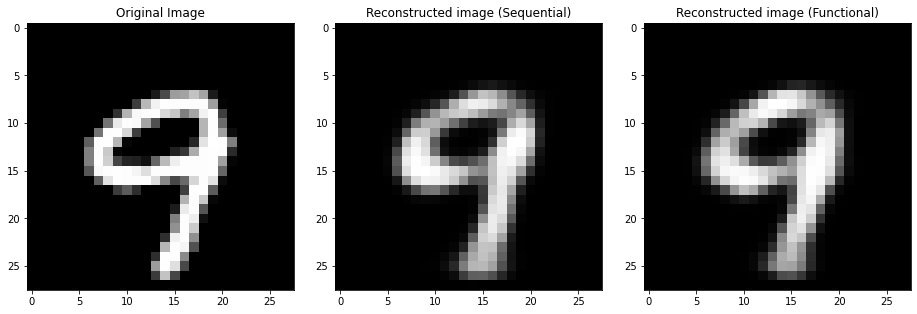

In [99]:
# plotting original vs reconstructed
index = 58

_, ax = plt.subplots(1,3,figsize=(13,13))
_.tight_layout()

# display prediction of fitted Sequential implementation vs original data
ax[0].imshow(x_test[index], cmap='gray') # the original image
ax[0].title.set_text('Original Image')
ax[1].imshow(result[0][index,:].reshape((28,28)), cmap = 'gray') # reconstruction of the model (how the latest layer looks like)
ax[1].title.set_text('Reconstructed image (Sequential)')

# display prediction of fitted Functional implementation vs original data
ax[2].imshow(result[1][index,:].reshape((28,28)), cmap = 'gray')
ax[2].title.set_text('Reconstructed image (Functional)')

### 5.3 What happens with random noise?

In [93]:
# generate random vector
new_input = np.random.rand(1,28*28)

In [94]:
# model prediction
pred_sequential = autoencoder_sequential.predict(new_input)
pred_functional = autoencoder_functional.predict(new_input)

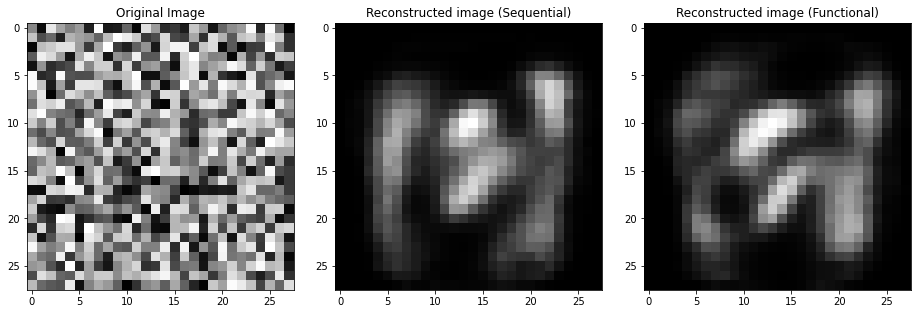

In [95]:
_, ax = plt.subplots(1,3,figsize=(13,13))
_.tight_layout()

ax[0].imshow(new_input.reshape((28,28)), cmap='gray') # the original image
ax[0].title.set_text('Original Image')
ax[1].imshow(pred_sequential.reshape((28,28)), cmap='gray') # what the model reconstructs
ax[1].title.set_text('Reconstructed image (Sequential)')
ax[2].imshow(pred_functional.reshape((28,28)), cmap='gray')
ax[2].title.set_text('Reconstructed image (Functional)')